In [1]:
#You can ignore any warnings using below lines

import warnings
warnings.simplefilter('ignore')

In [4]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

from statsmodels.stats.weightstats import ttest_ind

In [7]:
#Job performance scrore of 20 employees of a company, test score before starting this job and whether
#they belong to minority or not.

jobtest=pd.read_csv(r"C:\Users\divyakamat\data\DataSets\stats\jobtest.csv")
jobtest

,TEST,MINORITY,JPERF
0,0.28,1,1.83
1,0.97,1,4.59
2,1.25,1,2.97
3,2.46,1,8.14
4,2.51,1,8.00
5,1.17,1,3.30
6,1.78,1,7.53
7,1.21,1,2.03
8,1.63,1,5.00
9,1.98,1,8.04


In [9]:
jobtest.describe().T

,count,mean,std,min,25%,50%,75%,max
TEST,20.0,1.4715,0.678390,0.28,1.120,1.515,2.0075,2.51
MINORITY,20.0,0.5000,0.512989,0.00,0.000,0.500,1.0000,1.00
JPERF,20.0,4.5085,2.227711,1.39,2.965,4.220,6.0275,8.14


In [10]:
jobtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
TEST        20 non-null float64
MINORITY    20 non-null int64
JPERF       20 non-null float64
dtypes: float64(2), int64(1)
memory usage: 560.0 bytes


In [15]:
jobtest_memory = jobtest.memory_usage()
jobtest_memory

Index        80
TEST        160
MINORITY    160
JPERF       160
dtype: int64

In [16]:
jobtest['MINORITY']=jobtest['MINORITY'].astype('int8')

In [17]:
new_jobtest_memory = jobtest.memory_usage()
new_jobtest_memory

Index        80
TEST        160
MINORITY     20
JPERF       160
dtype: int64

In [18]:
new_jobtest_memory/jobtest_memory

Index       1.000
TEST        1.000
MINORITY    0.125
JPERF       1.000
dtype: float64

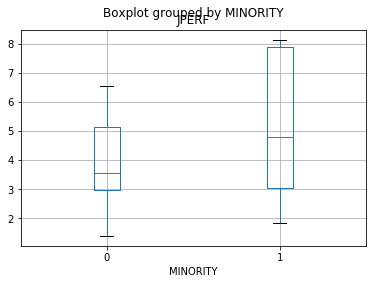

In [20]:
#First test is to check if the job test score differ based on the employee belonging to minority category or not

jobtest.boxplot(column=['JPERF'],by='MINORITY')

The median score for minority candidates are higher than the non minority candidates. 

Now, split the data for each minority

In [21]:
minority_0=jobtest[jobtest['MINORITY']==0]
minority_1=jobtest[jobtest['MINORITY']==1]

In [23]:
minority_0

,TEST,MINORITY,JPERF
10,2.36,0,3.25
11,2.11,0,5.30
12,0.45,0,1.39
13,1.76,0,4.69
14,2.09,0,6.56
15,1.50,0,3.00
16,1.25,0,5.85
17,0.72,0,1.90
18,0.42,0,3.85
19,1.53,0,2.95


In [25]:
#Ho (null hypothesis) - Job performance is not different between minorities
#H1 - Job performance is different between minorities

# Pass two job samples for minority
#Value = 0 means - checks if alternative hypothesis different from the value specified i.e is the
#difference in means > or < 0 ?

ttest_ind(minority_1['JPERF'],minority_0['JPERF'],alternative='two-sided',value=0)

(1.2963727328689172, 0.21122206282829195, 18.0)

(1.2963727328689172, 0.21122206282829195, 18.0)
(T-statistic,pvalue)

T-statistics indicates that the average value for one group is 1.29 times the other.
This indicates that there seems to be some differnce in means - but is it significant?

For this we need to check p-value.
p-value (0-5%) seems to be significantly high, i.e there is a 21% chance that this result that we go is due to shear chance, so we will have to accept null hypothesis and reject alternative hypothesis

i.e its 21% > 5%

There is no difference in job performance score based on minority and non-minority employees

## Another hypothesis using jobtest

In [26]:
#split the dataset based on job test scrore as the median value is 0.51

low_test=jobtest[jobtest['TEST'] < 1.5]
high_test=jobtest[jobtest['TEST'] >= 1.5]

In [27]:
ttest_ind(high_test['JPERF'],low_test['JPERF'],alternative='two-sided',value=0)

(3.1453782341253187, 0.0055947504189323687, 18.0)

value is 0.0055 < 0.05 , so we can accept the alternative hypothesis which indicates that there is some difference in the job performace scores between employees who scored below the  medians in their test score and who scored above the median

In [28]:
ttest_ind(low_test['JPERF'],high_test['JPERF'],alternative='two-sided',value=0)

(-3.1453782341253187, 0.0055947504189323687, 18.0)